# 1 - Introduction à segmentation d'image

## Librairies

In [53]:
from skimage.io import imread, imshow
from skimage import data
from skimage.color import rgb2gray, gray2rgb, rgb2hsv
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

## Importer et afficher une image

(256, 256)


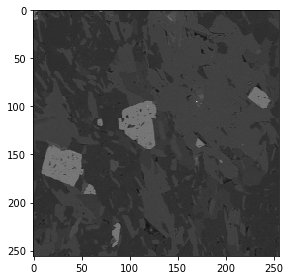

In [54]:
img = plt.imread('K389005_1144.png')
print(img.shape) # (lignes, colonnes, channel)
imshow(img)

## Seuil critique

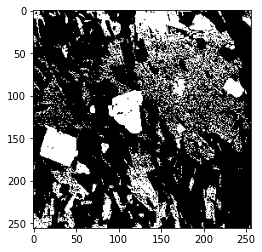

In [55]:
gray = rgb2gray(img)

gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

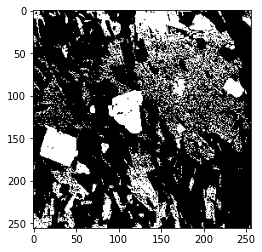

In [56]:
gray = rgb2gray(img)

gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

## Détection des bordures

In [57]:
# filtres de sobel
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, '\n filtre horizontal')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, '\n filtre vertical')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] 
 filtre horizontal
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] 
 filtre vertical


### Convultion de la matrice filtre (hor et ver)

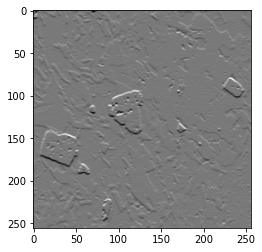

In [58]:
img = plt.imread('K389005_1144.png')

gray = rgb2gray(img)

out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')

plt.imshow(out_h, cmap='gray')

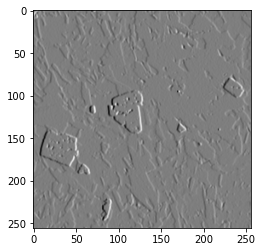

In [59]:
plt.imshow(out_v, cmap='gray')

### Opérateur Laplacien (filtre hor et ver en même temps)

In [60]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


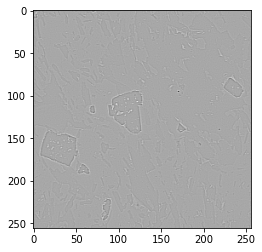

In [61]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

## Méthode K-mean

In [78]:
img = imread('K389005_1144.png', True)/255  #en divisant par 255, la valeur des pixels est ramenée entre 0 et 1

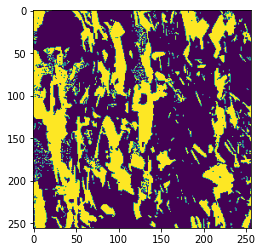

In [90]:
from sklearn.cluster import KMeans

img_n = img.reshape(img.shape[0]*img.shape[1],1)
img_n.shape

kmeans = KMeans(n_clusters=2, random_state=None).fit(img_n)
img2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_img = img2show.reshape(img.shape[0], img.shape[1])
plt.imshow(cluster_img)

NameError: name 'ndi' is not defined

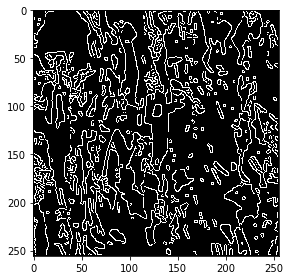

In [91]:
from skimage.feature import canny
edges = canny(cluster_img)
imshow(edges)
img_fill = ndi.binary_fill_holes(edges)
imshow(img_fill)

# 2 - Skimage

## Changer de format de couleur

### RGB à Gray

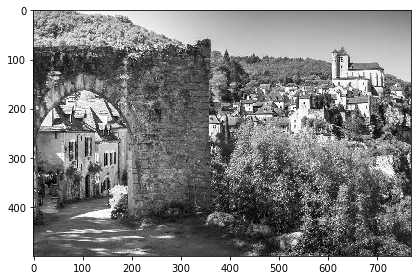

In [64]:
img = imread('img_01.jpg')
img_gray = rgb2gray(img)
imshow(img_gray)

### Gray à RGB

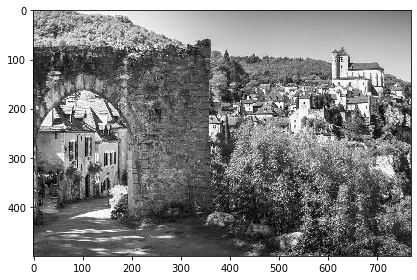

In [65]:
imshow(gray2rgb(img_gray)) #copie les données 'gray' sur les 3 channel rouge, vert et bleu

### RGB à HSV

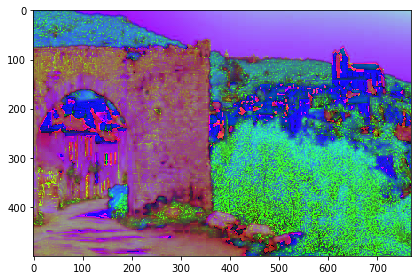

In [66]:
imshow(rgb2hsv(img))

### RGBA à RGB

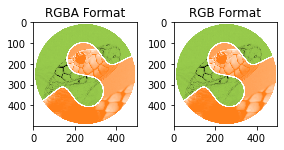

In [67]:
from skimage.color import rgba2rgb

img_rgba = data.logo()
img_rgb = rgba2rgb(img_rgba)

plt.subplot(131), imshow(img_rgba)
plt.title('RGBA Format') 

plt.subplot(132), imshow(img_rgb)
plt.title('RGB Format') 

plt.show()

## Changer la taille de l'image

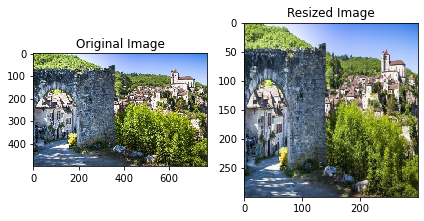

In [68]:
from skimage.transform import resize
#resize image
img_resized = resize(img, (300, 300))

#plot images
plt.subplot(121), imshow(img)
plt.title('Original Image')
plt.subplot(122), imshow(img_resized)
plt.title('Resized Image')
plt.show()

## Changer l'échelle de l'image

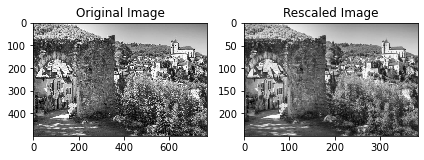

In [69]:
from skimage.transform import rescale

img = imread('img_01.jpg', as_gray=True)

img_rescaled = rescale(img, scale=(0.5, 0.5))


plt.subplot(121), imshow(img)
plt.title('Original Image')

plt.subplot(122), imshow(img_rescaled)
plt.title('Rescaled Image')

plt.show()

## Filtre Sobel avec Skimage

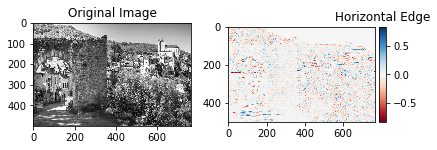

In [70]:
from skimage.filters import sobel_h

image = imread('img_01.jpg', as_gray=True)
image_sobelh = sobel_h(image)

plt.subplot(121), imshow(image)
plt.title('Original Image')

plt.subplot(122), imshow(image_sobelh)
plt.title('Horizontal Edge')

plt.show()

## Masque d'image

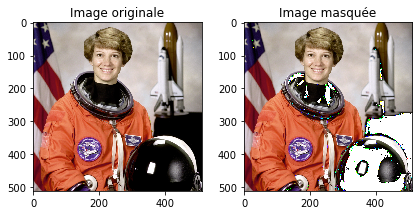

In [71]:
from skimage import data

image = data.astronaut()

plt.subplot(121), imshow(image)
plt.title('Image originale')

image[image==0]=255 #transforme les pixels noirs en pixels blancs
plt.subplot(122), imshow(image)

plt.title('Image masquée')
plt.show()

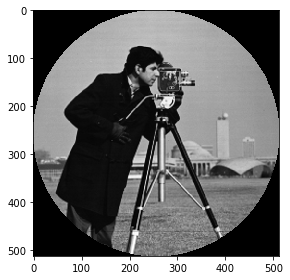

In [72]:
camera = data.camera()

nrows, ncols = camera.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (nrows / 2)**2) #equation d'un cercle
camera[outer_disk_mask] = 0

imshow(camera)

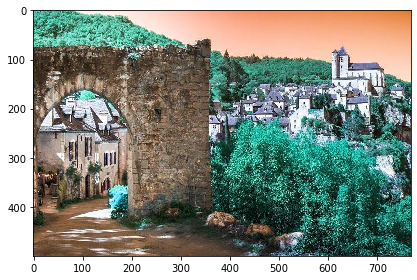

In [73]:
img = imread('img_01.jpg', as_gray=False)
imshow(img[:, :, ::-1]) #inversion des channels, R->B et B->R (comme pour openCV)

## Traitement image

### Améliorer le constraste

0.6359807585825027


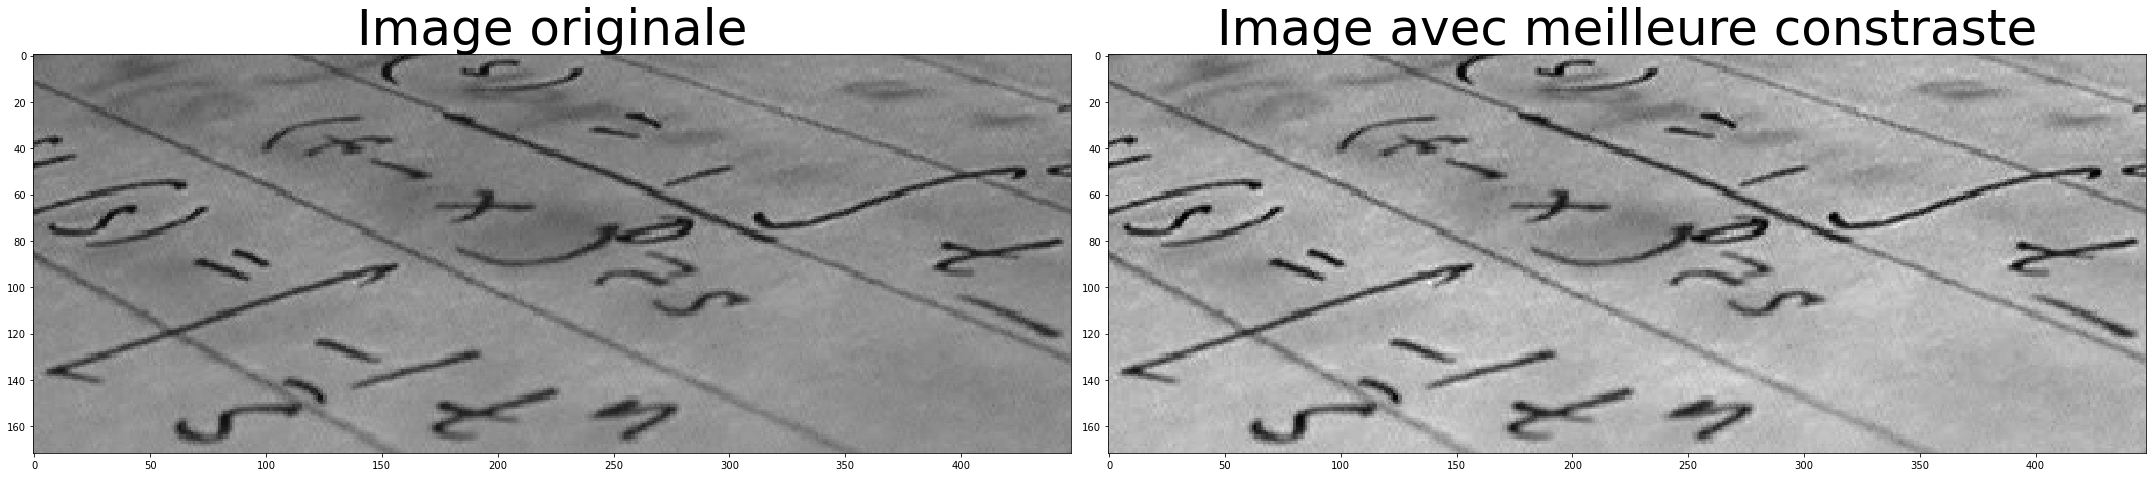

In [88]:
from skimage import exposure

img = data.text()

better_contrast = exposure.rescale_intensity(img)

better_contrast.min(), better_contrast.max()

plt.figure(figsize=(30,30))
plt.subplot(121), imshow(img)
plt.title('Image originale', fontsize=50)
plt.subplot(122), imshow(better_contrast)
plt.title('Image avec meilleure constraste', fontsize=50)
plt.show()


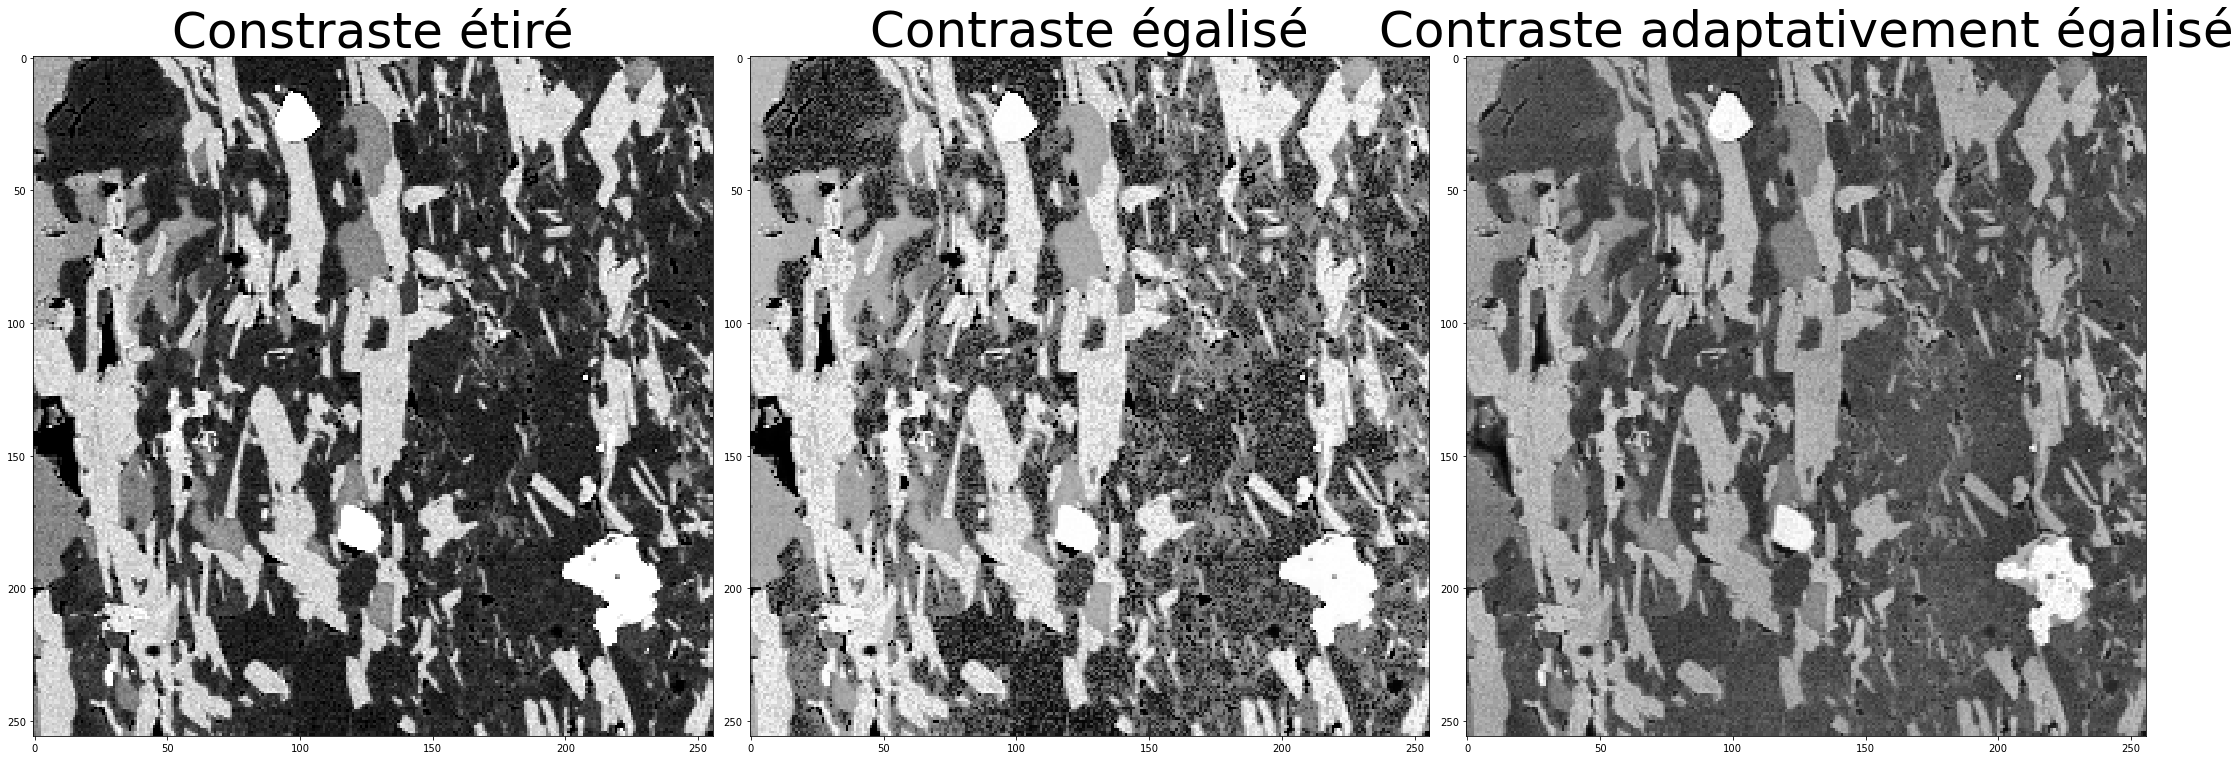

In [89]:
# Contrast stretching

img = imread('K389005_30.png')

p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

plt.figure(figsize=(30,30))
plt.subplot(131), imshow(img_rescale)
plt.title('Constraste étiré', fontsize=50)
plt.subplot(132), imshow(img_eq)
plt.title('Contraste égalisé', fontsize=50)
plt.subplot(133), imshow(img_adapteq)
plt.title('Contraste adaptativement égalisé', fontsize=50)
plt.show()

## Fonction np.pad pour modifier les bordures d'une image

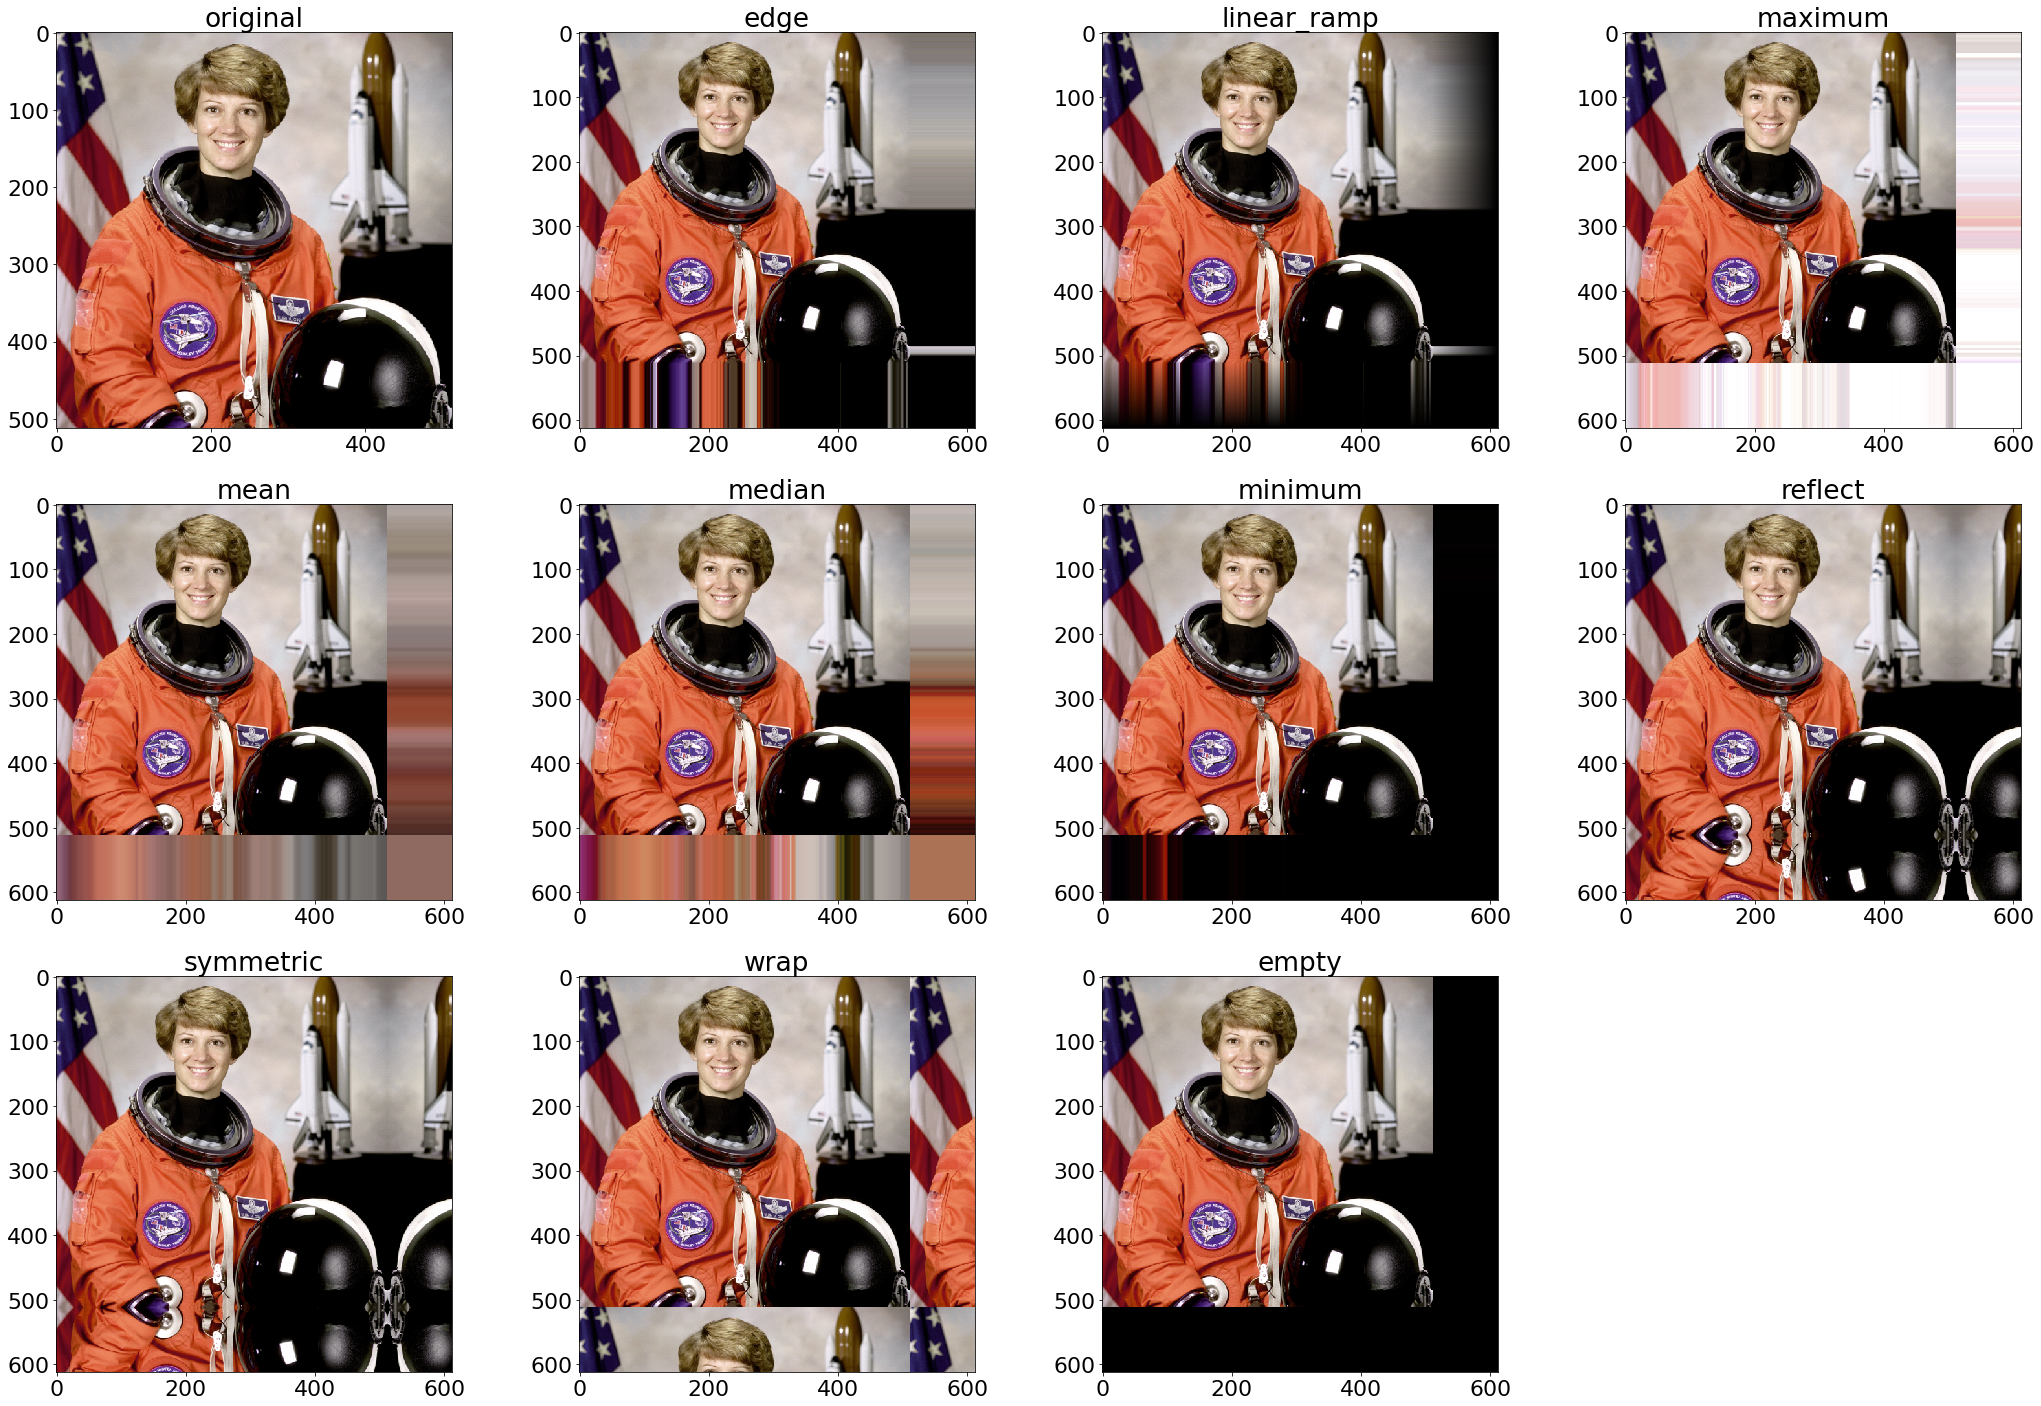

In [76]:
img = data.astronaut()

img_pad = []

modes = [
'edge',
'linear_ramp',
'maximum',
'mean',
'median',
'minimum',
'reflect',
'symmetric',
'wrap',
'empty']

plt.rcParams.update({'font.size': 22})

pad_width = (0,100), (0,100), (0,0)
#bordure haut et bas ajoutées
#bordure gauche et droites ajoutées

for mode in modes:
    img_pad.append(np.pad(img, pad_width=pad_width, mode=mode))

plt.figure(figsize=(30,20))
    
plt.subplot(341), imshow(img), plt.title('original')

for i, image in enumerate(img_pad):
    plt.subplot(3,4,2+i), imshow(image), plt.title(modes[i])
    
plt.show()

## Morphologie mathématique

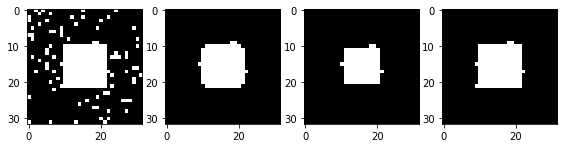

In [77]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

square = np.zeros((32, 32)) #image noire 32x32
square[10:-10, 10:-10] = 1 #carré blanc de 10x10

np.random.seed(2)

noise = 100 #nombre de pixel bruit

x, y = (32*np.random.rand(2, noise)).astype(np.int) #coordonnées aléatoires pour les pixels de bruit
square[x, y] = 1 #pixels bruit en blanc

open_square = ndimage.binary_opening(square) #erosion + dilatation
eroded_square = ndimage.binary_erosion(square)
reconstruction = ndimage.binary_propagation(eroded_square, mask=square)

plt.rcParams.update({'font.size': 10})

plt.figure(figsize=(9.5, 3))
plt.subplot(141)
plt.imshow(square, cmap=plt.cm.gray, interpolation='nearest')
plt.subplot(142)
plt.imshow(open_square, cmap=plt.cm.gray, interpolation='nearest')
plt.subplot(143)
plt.imshow(eroded_square, cmap=plt.cm.gray, interpolation='nearest')
plt.subplot(144)
plt.imshow(reconstruction, cmap=plt.cm.gray, interpolation='nearest')
plt.show()